In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Checking data types and null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Changing blank values with zero and changing data type of totalcharges

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Checking null values

In [7]:
df.isnull().sum().sum()

np.int64(0)

# Check for duplicates 

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df["customerID"].duplicated().sum()

np.int64(0)

# Converting Senior citizen 1/0 to yes/no  (To make easier to understand)

In [10]:
# def convert(value):
#     if value == 1:
#         return "Yes"
#     else:
#         return "No"

# df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# How many customers have churned 

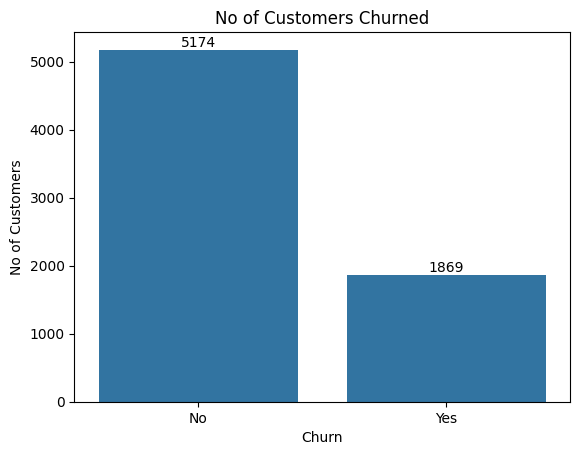

In [11]:
ax = sns.countplot(x = df["Churn"])
ax.bar_label(ax.containers[0])

plt.title("No of Customers Churned")
plt.xlabel("Churn")
plt.ylabel("No of Customers")
plt.show()

# Showing in percentage

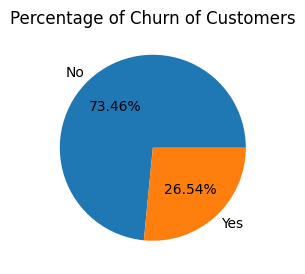

In [12]:
gp = df.groupby("Churn").agg({"Churn":"count"})
gp

plt.figure(figsize = (3,4))
plt.pie(gp["Churn"],labels = gp.index, autopct = "%1.2f%%")
plt.title("Percentage of Churn of Customers")
plt.show()

# Let's explore the reason behind chrurning 

***Gender wise***

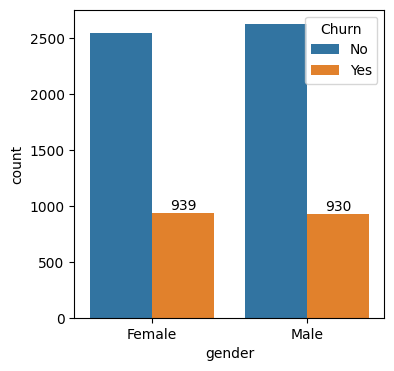

In [13]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = df["gender"],hue = df["Churn"])
ax.bar_label(ax.containers[1])
plt.show()

***How many senior citizens are there***

In [15]:
df1 = pd.read_csv("Customer Churn.csv")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# df1["TotalCharges"] = df1["TotalCharges"].replace(" ","0")
# df1["TotalCharges"] = df1["TotalCharges"].astype("float")

In [18]:
# df1.info()

In [30]:
# def convert(value):
#     if value==1:
#         return "Yes"
#     else:
#         return "No"

# df1["SeniorCitizen"] = df1["SeniorCitizen"].apply(convert)

In [20]:
# df.head(60)

***Now***

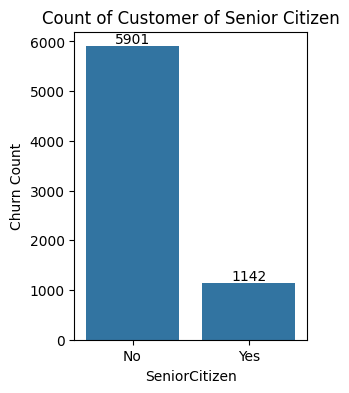

In [31]:
plt.figure(figsize = (3,4))
ax =sns.countplot(x="SeniorCitizen",data = df1)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer of Senior Citizen")
plt.ylabel("Churn Count")
plt.show()

# Stacked Bar using cgpt

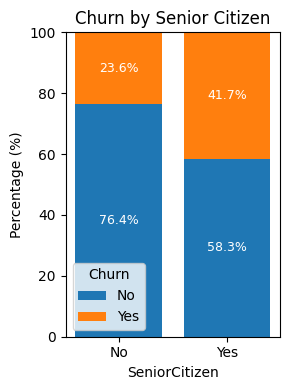

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Group and pivot the data
grouped = df1.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
pivot = grouped.pivot(index='SeniorCitizen', columns='Churn', values='Count').fillna(0)

# 2. Convert counts to percentages
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# 3. Plot stacked bar chart
fig, ax = plt.subplots(figsize=(3, 4))
bottom = [0] * len(pivot_percent)

# Stack each Churn category
for churn_value in pivot_percent.columns:
    ax.bar(pivot_percent.index, pivot_percent[churn_value], 
           bottom=bottom, label=churn_value)

    # Add labels
    for i, val in enumerate(pivot_percent[churn_value]):
        if val > 0:
            ax.text(i, bottom[i] + val / 2, f'{val:.1f}%', 
                    ha='center', va='center', color='white', fontsize=9)
    bottom = [i + j for i, j in zip(bottom, pivot_percent[churn_value])]

# Final touches
plt.title("Churn by Senior Citizen")
plt.ylabel("Percentage (%)")
plt.xlabel("SeniorCitizen")
plt.ylim(0, 100)
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


#Comparatively a greater percentage of Senior Citizen customers have churned out

# Churned Out Data based on Tenure

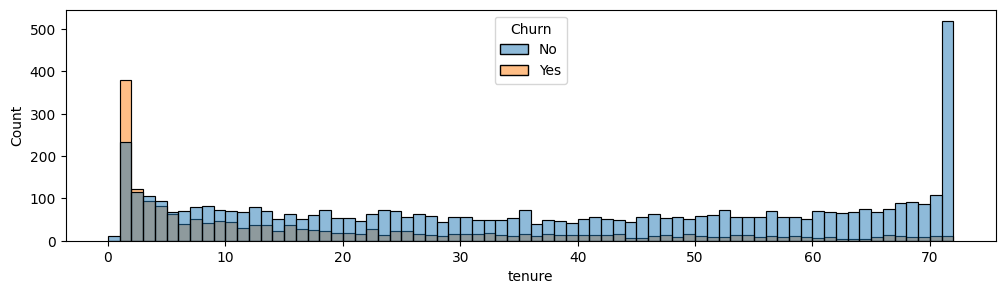

In [67]:
plt.figure(figsize = (12,3))
sns.histplot(x = "tenure", data = df,color = 'orange',bins =72, hue = "Churn")
plt.show()

#people who used services for long time has stayed and who used for 1-2 months have been churned

# Contract wise Churn data 

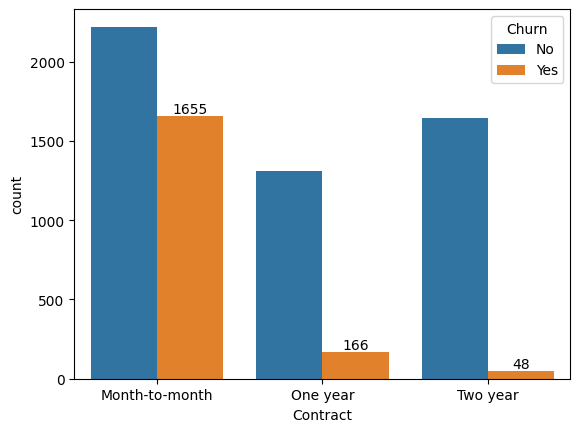

In [88]:
ax =sns.countplot(x= "Contract", data =df,hue = "Churn")
ax.bar_label(ax.containers[1])
plt.show()

#customers who have month to month contract are likely to churn than those have 1 or 2 year contract

# For Other Columns also

In [91]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

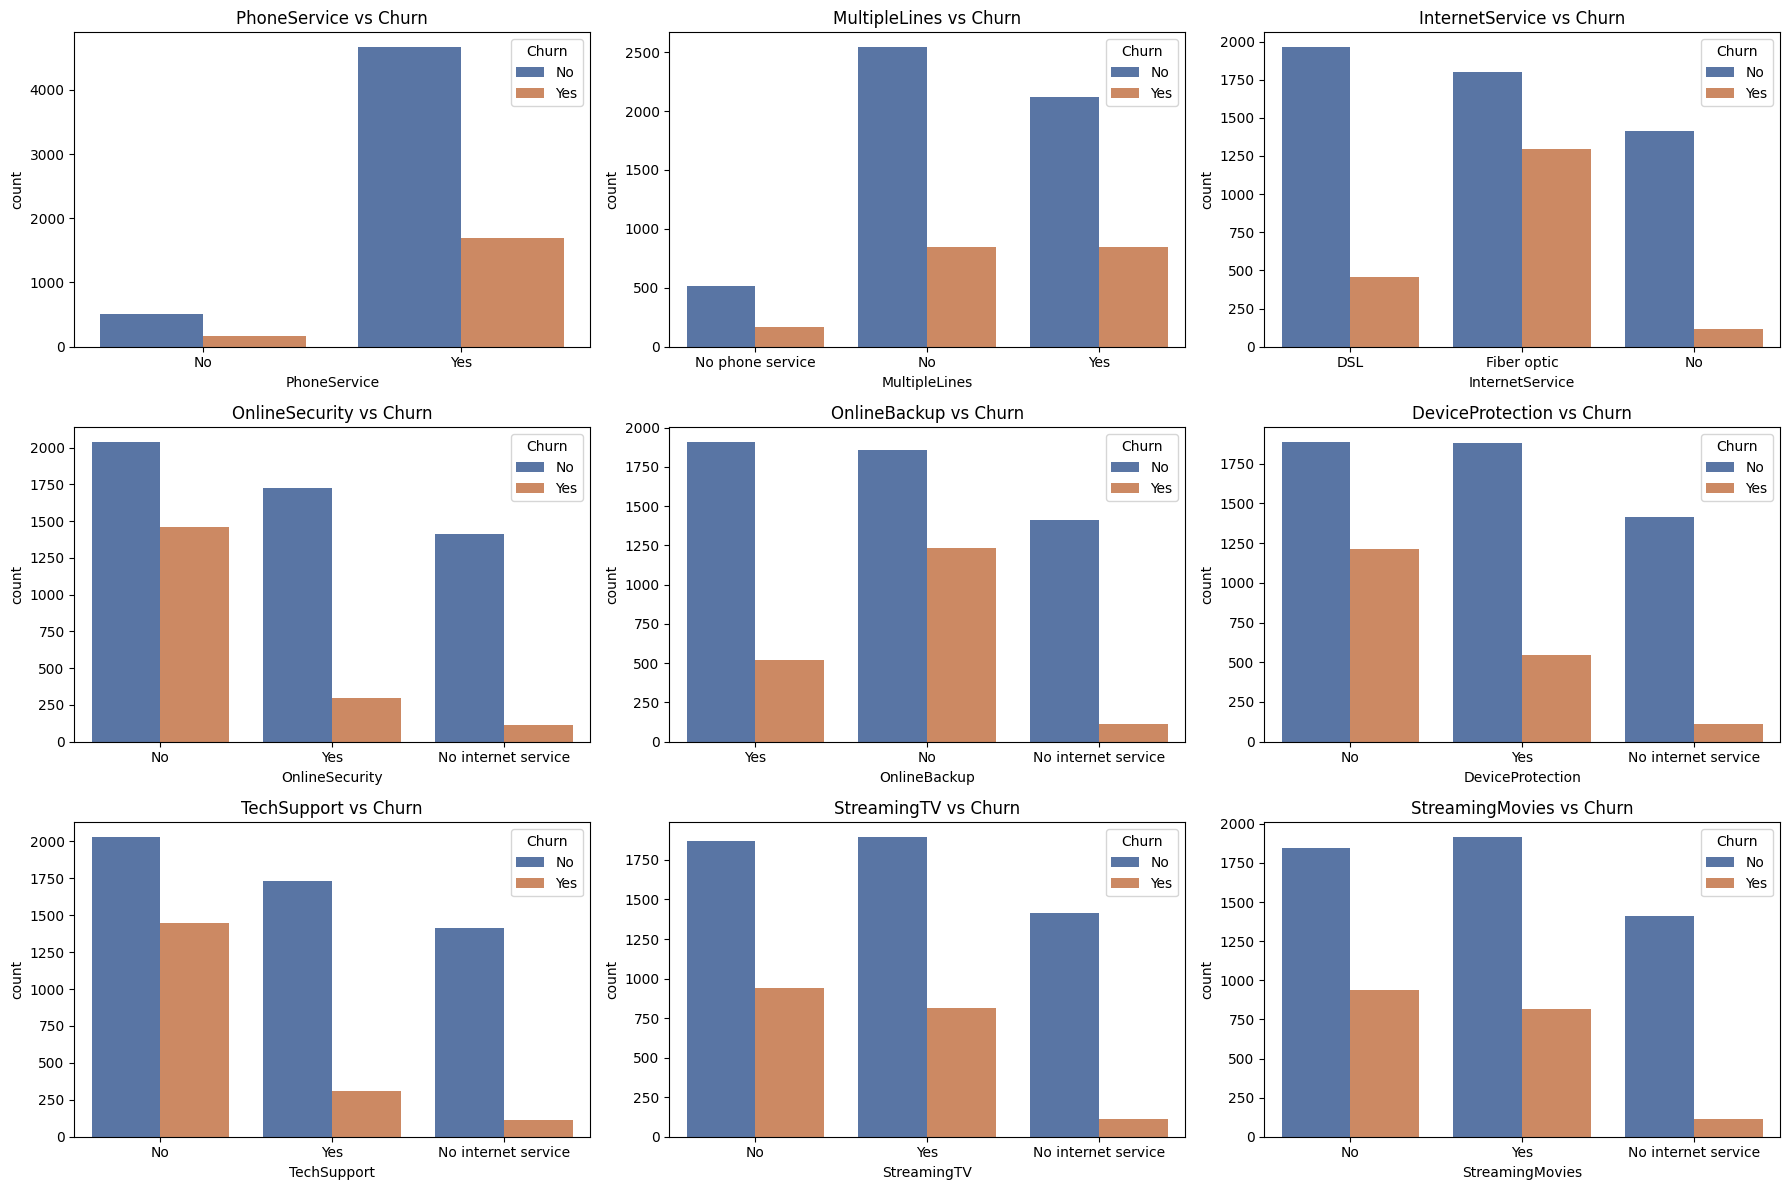

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df1, hue='Churn', ax=axes[i], palette='deep')
    axes[i].set_title(f"{col} vs Churn", fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


#Customers without OnlineSecurity, TechSupport, or DeviceProtection have higher churn. Churn is also higher among users of Fiber optic internet compared to DSL. Those without PhoneService or who have No internet service show the lowest churn. Having supportive services is linked to lower churn.

# Based on Payment Methods

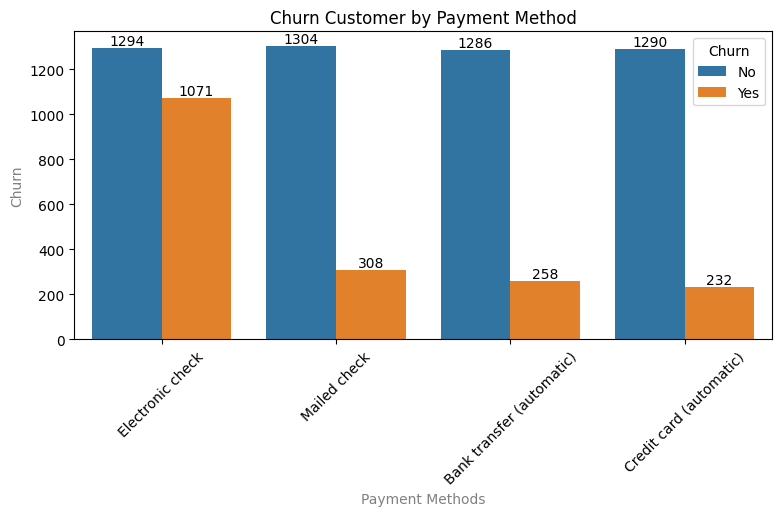

In [147]:
plt.figure(figsize = (9,4))
ax =sns.countplot(x= "PaymentMethod",data=df,hue = "Churn")
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])

plt.title("Churn Customer by Payment Method")
plt.xlabel("Payment Methods",color = 'grey',fontsize = 10)
plt.ylabel("Churn",color = 'grey',fontsize = 10)
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churn when they are using Electronic check as payment method